<a href="https://colab.research.google.com/github/UBCO-COSC-407-Winter-2021-Term-1/lab-7---lab-7-cuda-threads-and-kernel-launches-mtwichan/blob/main/A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A7 (34 Marks)**

**Focus**: CUDA Basics - Investigating Threads and Kernel Launches

This lab is a derivative of materials provided by PDC Center for High Performance Computing (HPC) and is licensed under a [Creative
Commons Attribution-ShareAlike 4.0 International
License](http://creativecommons.org/licenses/by-sa/4.0/).

In this lab, we are going to be using Google Colab version and takes advantage of the free Cloud GPUs offered through the platform for CUDA development. Colab Notebooks (you're reading one right now!) are typically designed to run Python code, however, we'll be modifying them in such a way that we can run CUDA code (as discussed in the lectures) on the GPU.

Please note that your code will be written and run directly within this assignment. You will need to save a local copy and ensure that you save and upload your completed notebook to your GitHub repo for submission.   You will also need to provide screenshots of output in many cases for submissions.  

**CRITICAL**

Lastly, keep in mind that anytime your runtime disconnects or is restarted **you must re-run the Notebook Setup code block**. This applies to all CUDA assignments done using Google Colab.

## **Notebook Setup: GPU Runtime**

Before writing/running any CUDA code, we need to ensure Colab is provisioning a Cloud GPU for us. To do this, click on the "Runtime" menu item in the top bar and select the "Change runtime type" option. Select "GPU" from the list of Hardware accelerators and click "Ok". 

## **Notebook Setup: CUDA Compilation**

To enable CUDA code compilation on Colab Notebooks, we'll employ use of the NVCC4Jupyter plugin (source code/documentation available [here](https://github.com/UBCO-COSC-407-Winter-2021-Term-1/nvcc4jupyter). This plugin effectively turns any Colab Notebook code block that includes `%%cu` into compilable/runnable CUDA code.

To download/install/enable NVCC4Jupyter, please run the following code block. **Running this block is required anytime you connect/restart/reconnect to an instance.** To run a code block, mouse over it and click the play button on left side.

You should see some output when you click the play button. Wait until the code block is finished running (this is indicated when the stop button goes away). The last couple lines of output should look something like the following:

```
created output directory at /content/src
Out bin /content/result.out
```

If your last two lines of output look something like above, you're ready to begin the assignment!

In [3]:
# Run the following to configure your notebook for CUDA code
!pip install git+https://github.com/UBCO-COSC-407-Winter-2021-Term-1/nvcc4jupyter.git
%load_ext nvcc_plugin

  Cloning https://github.com/UBCO-COSC-407-Winter-2021-Term-1/nvcc4jupyter.git to /tmp/pip-req-build-boq1x1mo
  Running command git clone -q https://github.com/UBCO-COSC-407-Winter-2021-Term-1/nvcc4jupyter.git /tmp/pip-req-build-boq1x1mo
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4405 sha256=ac15f7b8f9ea2de1046819208a76bfec8a1705218ef569e354a7d843ae74d7c9
  Stored in directory: /tmp/pip-ephem-wheel-cache-ul5t1p_o/wheels/49/79/63/122fdbb3c7735e9211410257d1f1171d27b8c694dd9dc7e119
Successfully built NVCCPlugin
created output directory at /content/src
Out bin /content/result.out


## **Question 1. [+2]**

In this question, you will examine kernel launch configurations as well as using printf in both the CPU and GPU versions of your code.  Take a few minutes to examine ``Q1.cu`` (located below), specfically looking at the host and device versions of the function as well as the kernel launch.  The file can be compiled and run by clicking the play button, located to right of the code cell.

---
**TO-DO [1.1]**

Examine the contents of ``Q1.cu`` (below).  Pay attention on how the the CUDA kernel ``gpu_helloworld()`` is launched
with the triple-bracket ``<<<>>>`` notation. Also, observe the declaration of the
kernel with ``__global__``.

---

As you have observed, the source code of the mentioned file is easy to follow.
Here, we just print a certain text using the ``printf()`` function, both in the CPU version and the GPU version.  In the GPU version, each thread will print out the thread identifier (`ThreadIdx.x`).  In the example, the kernel is launched with one block in the grid, where the block contains 32 threads.  
Here was can use the predefined ``threadIdx`` constant on the X direction to determine the thread number. In other words, we are declaring the grid dimension as ``grid(1)`` and the block
dimension as ``block(32)``.  To declare the block and grid size, we will use the pre-defined variables that are of type `dim3`.  A `dim3` is a vector type with three accessible components that we will be using to specify the dimension of blocks and grids (see http://www.icl.utk.edu/~mgates3/docs/cuda.html).

Given the fact that the base type for each variable is `dim3`, this means that we are implicitly creating a grid of blocks in the (X, Y, Z) direction with a value 1 for Y and Z by default. The declaration of the example is equivalent to the following:

`dim3 grid(1,1,1); // 1 block in the grid`

`dim3 block(32,1,1); // 32 threads per block`

This represents exactly what we had before (i.e., a grid of one block, whose number of threads per block is 32 in the X direction). Understanding the way indices work in CUDA is not trivial, so do not worry if you are a little bit confused. The goal of this lab is to help you understand this concept.

Run the code and inspect the output.   You might be suprised with the output, expecting to see messages from the 32 threads.  Yes, you are right, this is the confusing part as we only get a response from the CPU.  

We are going to parallelize the code using the local GPU of the node, and we are not interested on using more nodes or more CPU processes.  For now, we just want a single process that has access to the GPU, but within the GPU we will request 32 threads. 

---
**TO-DO [1.2]**
You wil need to modify the code so that it will print out messages from the GPU threads as well (review the notes and think about synchronization.  This might be helpful: https://docs.nvidia.com/cuda/cuda-runtime-api/group__CUDART__DEVICE.html#group__CUDART__DEVICE_1g10e20b05a95f638a4071a655503df25d).  

---

Modify your code directly in the notebook.  If everything went as expected, you should see the following output:

```
Hello from the CPU!
Hello from the GPU! My threadId is 0
Hello from the GPU! My threadId is 1
Hello from the GPU! My threadId is 2
...
Hello from the GPU! My threadId is 29
Hello from the GPU! My threadId is 30
Hello from the GPU! My threadId is 31
```

**Question 1 (1 mark)** From your investigation, is the GPU kernel execution execution synchronous or asynchronous?  Answer below.


In [ ]:
Hello from the CPU!
Hello from the GPU! My threadId is 0
Hello from the GPU! My threadId is 1
Hello from the GPU! My threadId is 2
Hello from the GPU! My threadId is 3
Hello from the GPU! My threadId is 4
Hello from the GPU! My threadId is 5
Hello from the GPU! My threadId is 6
Hello from the GPU! My threadId is 7
Hello from the GPU! My threadId is 8
Hello from the GPU! My threadId is 9
Hello from the GPU! My threadId is 10
Hello from the GPU! My threadId is 11
Hello from the GPU! My threadId is 12
Hello from the GPU! My threadId is 13
Hello from the GPU! My threadId is 14
Hello from the GPU! My threadId is 15
Hello from the GPU! My threadId is 16
Hello from the GPU! My threadId is 17
Hello from the GPU! My threadId is 18
Hello from the GPU! My threadId is 19
Hello from the GPU! My threadId is 20
Hello from the GPU! My threadId is 21
Hello from the GPU! My threadId is 22
Hello from the GPU! My threadId is 23
Hello from the GPU! My threadId is 24
Hello from the GPU! My threadId is 25
Hello from the GPU! My threadId is 26
Hello from the GPU! My threadId is 27
Hello from the GPU! My threadId is 28
Hello from the GPU! My threadId is 29
Hello from the GPU! My threadId is 30
Hello from the GPU! My threadId is 31


Keep in mind that there is more than one way to solve this problem, and that it does introduce a performance bottleneck. 

***Note:*** See below that `%%cu` needs to be added to let Colab know that the code block is CUDA code.

***Marking Guide:***
* +1 mark for code change generate correct output
* +1 mark for question answer


In [4]:
%%cuda --name Q1.cu --compile true


#include <stdio.h>
#include "cuda_runtime.h"
#include "device_launch_parameters.h"

void cpu_helloworld()
{
    printf("Hello from the CPU!\n");
}

__global__ void gpu_helloworld(void)
{
    int threadId = threadIdx.x;
    printf("Hello from the GPU! My threadId is %d\n", threadId);
}

int main(int argc, char **argv)
{
    dim3 grid(1);                 // 1 block in the grid
    dim3 block(32);               // 32 threads per block
    
    // Call the CPU version
    cpu_helloworld();
    
    // Launch the kernal with 1 block in the grid and 32 threads in the block
    gpu_helloworld<<<grid, block>>>();
    cudaDeviceSynchronize();
 
    
    // code changes here! - You will want to have the messages returned from the GPU before proceeding
    
    return 0;
}


Hello from the CPU!
Hello from the GPU! My threadId is 0
Hello from the GPU! My threadId is 1
Hello from the GPU! My threadId is 2
Hello from the GPU! My threadId is 3
Hello from the GPU! My threadId is 4
Hello from the GPU! My threadId is 5
Hello from the GPU! My threadId is 6
Hello from the GPU! My threadId is 7
Hello from the GPU! My threadId is 8
Hello from the GPU! My threadId is 9
Hello from the GPU! My threadId is 10
Hello from the GPU! My threadId is 11
Hello from the GPU! My threadId is 12
Hello from the GPU! My threadId is 13
Hello from the GPU! My threadId is 14
Hello from the GPU! My threadId is 15
Hello from the GPU! My threadId is 16
Hello from the GPU! My threadId is 17
Hello from the GPU! My threadId is 18
Hello from the GPU! My threadId is 19
Hello from the GPU! My threadId is 20
Hello from the GPU! My threadId is 21
Hello from the GPU! My threadId is 22
Hello from the GPU! My threadId is 23
Hello from the GPU! My threadId is 24
Hello from the GPU! My threadId is 25
H

## **Question 2. [+18]**

Now that you understand how to compile and run a CUDA program, in this exercise we explore the functionality required to get a kernel to work in detail. This includes defining the distribution of the threads or adding memory management operations to transfer data from the host memory to the GPU, and back. We will use host or CPU to refer to the CPU space.

For this purpose, we will implement a simple SAXPY program. SAXPY is very suitable in helping to  understand how to index 1D arrays inside a GPU kernel. The term stands for "Single-Precision A*X Plus Y", where A is a constant, and X and Y are arrays.

---
**TO-DO [2.1]**

Examine the code in the notebook below. In particular, make sure you understand the ``cpu_saxpy()`` function. We will use this function as reference for the GPU version later in the exercise.

---

We will use this file for solving the problems presented in this exercise. The source code
contains a ``main()`` function that allocates two arrays, x and y, and initializes
each element of the array with 0.1 and 0.2 respectively. It is expected that
the user provides the value of the constant "a" as the start of the
program. The size of each array is predefined with the constant ``ARRAY_SIZE``.
Right now, the program only calls ``cpu_saxpy()`` to compute the SAXPY result using the CPU, but later you will add a call to the GPU version.
Finally, the code generates a naive hash of the result of both versions. This
will be used at the end of the execution to compare the solutions of the CPU
version and the GPU version.

We are going to introduce small changes into the source code to
allow for a SAXPY version on the GPU. As a rule of thumb, every CUDA program is
usually defined by following these simple five steps:

1. **Declare and implement the CUDA kernel** that you would like to execute on the
GPU.
2. **Define the distribution of the threads**, in terms of the dimension of the
grid and the dimension of each block (of threads) inside the grid.
3. **Declare and define the GPU memory required** to execute the CUDA kernel. This
includes transferring the data from the host to the GPU, if needed.
4. **Execute the CUDA kernel** with the correspondent parameters.
5. **Transfer the results from the GPU** to the host. Alternatively, use a
synchronization function to guarantee that the host waits for the GPU to
execute the kernel.

In this exercise, we changed the order of some of these steps just so that we
force you to think on the main CUDA concepts. For instance, we will ask you to
implement the content of the kernel at the end of this exercise. The reason is
that we consider more relevant for you to initially understand how the
execution flow from the CPU to the GPU (and back) works. Thus, we are going to
focus inside the ``main()`` function to enable the execution of the CUDA kernel.

First, let us define how many threads will be needed to compute the CUDA
kernel. We suggest you to use the constant ``ARRAY_SIZE`` to calculate the number
of blocks (of threads) to be used. For the block dimension, use only the
constant ``BLOCK_SIZE``. These two constants are defined on top of the file. Note
that, as we are using only 1D arrays, it is enough for you to define the
dimensions in terms of the X dimension only. You can check ``Q1.cu`` as
reference.

For instance, imagine that we have an ``ARRAY_SIZE`` of 16 elements. By using a
``BLOCK_SIZE`` of 4, we can configure the execution to use 4 blocks in the grid and
on the X direction only:

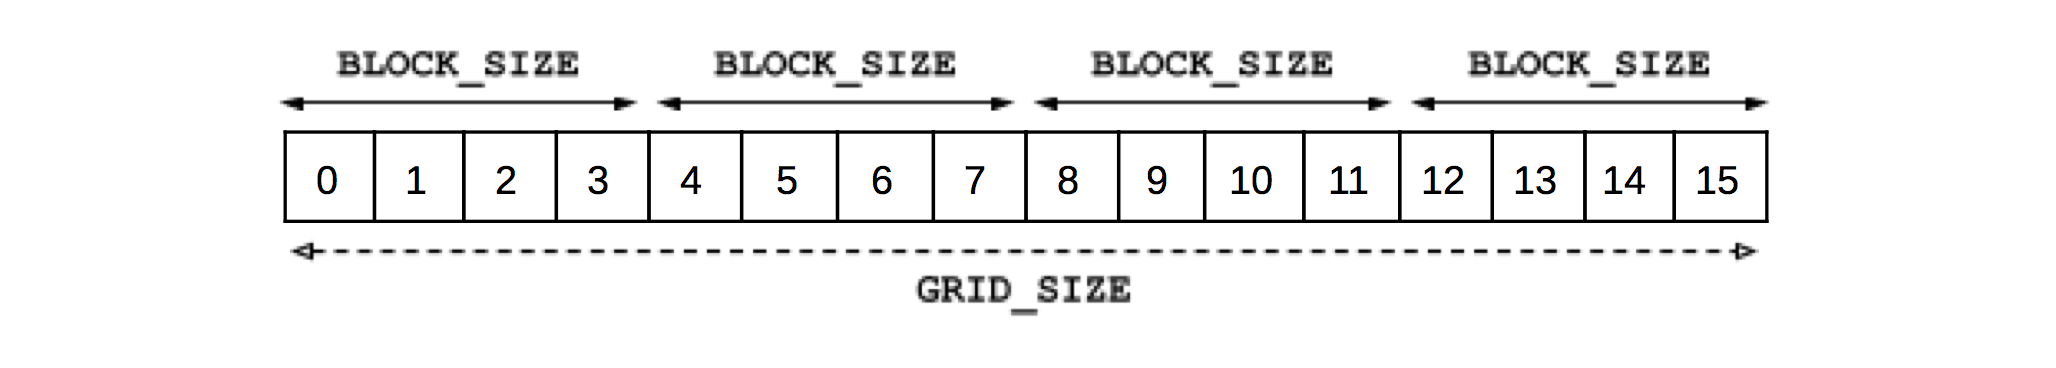


Inside the CUDA kernel, the GPU will provide us with chunks of ``BLOCK_SIZE``
threads. We will need to use this dimension afterwards to determine which
elements we have to access for each array of SAXPY. As a side note, we
displayed in the figure a ``GRID_SIZE`` constant, but the purpose is to reflect the size of the grid.

Developing a CUDA kernel requires a substantial mindset change from the
traditional CPU programming. The main one is the inherently absence of loops,
in favor of massively parallel number of threads that perform very small tasks
on specific elements of the data instead. In this case, we ideally want one
thread per element on each array. For now, try to concentrate on dividing the
workload assuming this fact. We will handle the specific details of thread
parallelism afterwards inside the SAXPY kernel.

---
**TO-DO [2.2] (3 marks)**

Find the "TO-DO #2.2" section inside ``Q2.cu`` and declare the grid and
block dimensions that will be used to launch the CUDA kernel of SAXPY. We
suggest you to request enough threads for the GPU to cover all the elements of
each array at once. Do not worry if you request more threads than elements in
the array, but try to fit the value.

+ Hint #1: Use the constant ``ARRAY_SIZE`` to determine how many blocks of
  threads in the X direction you will need.
+ Hint #2: Use the constant ``BLOCK_SIZE`` to define the number of threads in
  the X direction, per block.
+ Hint #3: For correctness, consider that the ``ARRAY_SIZE`` might not be
  multiple of the ``BLOCK_SIZE``.

---

After the grid and block dimensions are defined, the next step would be to
declare the device pointers that contain the elements of x and y, but on the
GPU side. The constant "a" can be passed by value to the CUDA kernel,
so no changes are required in this regard. We recommend you to always use the
prefix ``d_`` for the device-related pointers, as a good naming
convention. For instance, in this case, we should use ``d_x`` and ``d_y`` for the
device pointers that contain the elements of their equivalent x and y arrays in
the CPU:

```
float *d_x = NULL;
float *d_y = NULL;
```

Declaring only the ``d_x`` and ``d_y`` pointers will not seem to provide that much
value to your SAXPY kernel afterwards. The main reason is that we also need to
explicitly allocate each array on the GPU side. Thus, even though the arrays x
and y are already allocated on the host side, we should account for the fact
that the memory visible to the CPU is not visible to the GPU. 

> The Unified Memory Model of CUDA is an exception. This model manages the data
> transfer from the host to the GPU, and back, in an automatic manner. In this
> laboratory session, we use the classical model, where the memory management is
> up to the programmer. This also has benefits for performance.

Moreover, the content of each array must be manually transferred from the host
side (i.e., we want to define the device arrays to contain the same elements as
in the CPU version).

---
**TO-DO [2.3] (6 marks)** 

Find the "TO-DO #2.3.1" section inside ``Q2.cu`` and declare the device
pointers ``d_x`` and ``d_y`` of type float. Thereafter, look for the
"TO-DO #2.3.2" section and allocate the arrays on the GPU. Do not forget to copy the
content of each array from the host side!

+ Hint #1: Use the constant ``ARRAY_SIZE`` to determine the size of each array
  (in bytes).
+ Hint #2: Use the memory management functions of CUDA
  [https://goo.gl/8VC46E](https://goo.gl/8VC46E) and
  [https://goo.gl/vcxdKi](https://goo.gl/vcxdKi).

---

After the arrays have been allocated on the GPU and its content transferred
from the CPU side, we are going to finish setting up the launch of the kernel
inside the ``main()`` function. The last steps would be to execute the kernel using
the grid and block dimensions that you defined earlier. We must also set the
device pointers ``d_x`` and ``d_y`` that you just allocated and filled with the content
from the host. Once again, check question 1 as reference.

---
**TO-DO [2.4] (2 marks)**

Find the "TO-DO #2.4" section inside ``Q2.cu`` and introduce the
necessary changes to launch the SAXPY kernel. Assume that the name of the
kernel is ``gpu_saxpy()`` and that the input parameters follow the interface of
the CPU version, but using ``d_x`` and ``d_y`` instead.

+ Hint #1: The triple-bracket ``<<<>>>`` notation is always required when calling a CUDA kernel.
+ Hint #2: Constants can be passed by value to a CUDA kernel, without any additional changes.

---

After we have defined the allocations on the GPU and established the launch of
the SAXPY kernel, we will introduce the last two changes to the ``main()``
function. The first one is to copy the result of the kernel from the GPU to the
host. Following the CPU implementation, assume that the result will be stored
on the ``d_y`` array. You can use the same ``cudaMemcpy()`` memory copy function as in
the previous steps, but making sure in this case that the order of the copy is
reversed. For the second change, we ask you to release the memory of each
device pointer at the end of the ``main()`` function. The source code currently
only releases the x and y arrays.

---
**TO-DO [2.5] (2 marks)**

Find the "TO-DO #2.5.1" section inside ``Q2.cu`` and copy the result
from ``d_y`` to ``y``. After this, find the "TO-DO #2.5.2" section and release
the device arrays ``d_x`` and ``d_y`` before the end of the ``main()`` function.

+ Hint #1: The order of the copy with ``cudaMemcpy()`` is reversed. This also
  applies to the input parameters!
+ Hint #2: You must use [https://goo.gl/zVjbeR](https://goo.gl/zVjbeR) to
  release each array.

---

**Now that everything is set-up, the last change is to declare and define the
CUDA kernel**. This represents 90% of the effort while developing GPU code, and
it is one of the main reason why we preferred to leave this big effort for the
last step, just so that you can consolidate your basic skills on CUDA. The rest
of the code that you added (i.e., setting up the kernel) is always going to be
very similar from application to application.

To make it simpler for you, let us split the implementation of the kernel in
two **TO-DO** steps. The first one is to declare the SAXPY kernel. We will
call it ``gpu_saxpy()``.

---
**TO-DO [2.6] (1 mark)**

Find the "TO-DO #2.6" section inside ``Q2.cu`` and declare an empty
``gpu_saxpy()`` kernel. Use the interface of the CPU version as reference.

+ Hint #1: Do not forget that CUDA kernels require a special keyword to
  differentiate from CPU functions.
+ Hint #2: The primitive types of CUDA are equivalent to the primitive types of
  plain C on the CPU (e.g., ``float``).

---

With the CUDA kernel declared, let us now implement the equivalent version of
SAXPY on the GPU, based on the original CPU implementation. For this, consider
the following:

1. You have to assume that thousands of independent threads will call this
   kernel. In fact, the key for a GPU kernel is to define massively parallel
   work.
2. You have to define a way to index the data being processed by the current
   thread in the kernel. Remember, you are splitting up the data into a grid of
   blocks of threads.
3. You have to guarantee that no thread accesses out-of-bounds data. If you
   defined more threads than elements per array (you might!), make sure all the
   accesses are correct.

With these few key-points in mind, here it comes the hardest part of the
exercise: implementing the CUDA version of SAXPY. Starting from the CPU
version, we ask you to calculate the index of the thread and to operate on the
data following the same SAXPY model as before. The output must be stored on
``d_y``. You can use ``threadIdx`` to understand the ID of the thread inside the block,
``blockIdx`` to understand the ID of the block that the thread belongs to, and
``blockDim`` to obtain the number of threads per block. Remember, we are operating
__on the X direction only__.

---
**TO-DO [2.7] (4 marks)**

Inside the ``gpu_saxpy()`` kernel declared in ``Q2.cu``, implement the GPU
version of SAXPY by calculating the index of the thread and performing the
computations for the specific elements that "belong" to the thread.
Store the result on ``d_y``. It is expected that you introduce an out-of-bounds
check, based on the input parameter "n".

+ Hint #1: If you are considering to use a loop, think twice!
+ Hint #2: Even though branches are costly on the GPU, do not worry, you can
  safely use an if-statement.

---

At this point, you have now completed most of the complexity of this exercise.
The last part is to evaluate if your code really works as expected.   Keep in mind that you also need to provide the
value of the constant "a" to the executable (e.g., 2.0 is fine).  Compile and run your Colab Notebook.  


If everything worked as expected, you should only see the following output:

```
Execution finished (error=0.000000).
```

If you managed to define the kernel and get exactly this output, well done!
This is a great achievement, congratulations! If you get something different,
such as an error message reporting that the solution is incorrect, quickly
review all the "**TO-DO**" steps of the exercise from the beginning to make sure
that you did not miss anything. Feel free to ask if you are lost, as the goal is to help you understand the challenges with CUDA/GPU programmoing.

Make sure you are comfortable with this process as it will be covered not only on the midterm exam, but also be required in the subsequent labs where we are going to extend this basic notion to
perform some more advanced computation over images and matrixes.

**For Q2, ensure that you submit:**
1.   The serial implementation running on the CPU.
2.   The CUDA implementation covering all the **TO-DO** items. 

***Note***:  You can find details on timing CUDA code at: https://developer.nvidia.com/blog/how-implement-performance-metrics-cuda-cc/ and https://programmerfish.com/profiling-cuda-kernels-and-wrapper-functions/.

***Marking Guide:***
See marks in problem description.  

### CUDA Implementation - Q2

Please code and run your CUDA implementation in the code block below. When submitting your assignment, please copy the code block into a text/cu file.

In [90]:
%%cuda --name Q2.cu --compile true

#include <stdio.h>
#include <sys/time.h>

#include "cuda_runtime.h"
#include "device_launch_parameters.h"

#define BLOCK_SIZE 256
#define ARRAY_SIZE 16777216

typedef struct timeval tval;

/**
 * Helper method to generate a very naive "hash".
 */
float generate_hash(int n, float *y)
{
    float hash = 0.0f;
    
    for (int i = 0; i < n; i++)
    {
        hash += y[i];
    }
    
    return hash;
}

/**
 * Helper method that calculates the elapsed time between two time intervals (in milliseconds).
 */
double get_elapsed(tval t0, tval t1)
{
    return (double)(t1.tv_sec - t0.tv_sec) * 1000.0L + (double)(t1.tv_usec - t0.tv_usec) / 1000.0;
}

/**
 * SAXPY reference implementation using the CPU.
 */
void cpu_saxpy(int n, float a, float *x, float *y)
{
    for (int i = 0; i < n; i++)
    {
        y[i] = a * x[i] + y[i];
    }
}

////////////////
// TO-DO #2.6 /////////////////////////////////////////////////////////////
// Declare the kernel gpu_saxpy() with the same interface as cpu_saxpy() //
///////////////////////////////////////////////////////////////////////////
__global__ void gpu_saxpy(int n, float a, float* x, float* y) {
    int i = blockIdx.x * blockDim.x + threadIdx.x;
    if (i < n) {
        y[i] = a * x[i] + y[i]; 
    }
}

int main(void)
{
    float a     = 0.0f;
    float *x    = NULL;
    float *y    = NULL;
    float error = 0.0f;
    clock_t start_t, end_t;
    double time_cpu = 0.0;
    double time_gpu = 0.0;
    int memory_size = sizeof(float) * ARRAY_SIZE;
    struct timeval t1, t2;
  
    ////////////////
    // TO-DO #2.2 ///////////////////////////////
    // Introduce the grid and block definition //
    /////////////////////////////////////////////
    dim3 gridsize((ARRAY_SIZE/BLOCK_SIZE) - 1,1,1), blocksize(BLOCK_SIZE, 1, 1);
    //////////////////
    // TO-DO #2.3.1 /////////////////////////////
    // Declare the device pointers d_x and d_y //
    /////////////////////////////////////////////
    float *d_x = NULL;
    float *d_y = NULL;
 
    // Make sure the constant is provided
    a = 123.4;
 
    //Allocate the arrays on the CPU
 
    x = (float *)malloc(memory_size);
    y = (float *)malloc(memory_size);
    
    // Initialize them with fixed values
    for (int i = 0; i < ARRAY_SIZE; i++)
    {
        x[i] = 0.1f;
        y[i] = 0.2f;
    }
    
    //////////////////
    // TO-DO #2.3.2 ////////////////////////////////////////////////////////
    // Allocate d_x and d_y on the GPU, and copy the content from the CPU //
    ////////////////////////////////////////////////////////////////////////
    cudaMalloc(&d_x, sizeof(float));
    cudaMalloc(&d_y, sizeof(float));
    
    gettimeofday(&t1, 0);
    cudaMemcpy(d_x, x, memory_size, cudaMemcpyHostToDevice);
    cudaMemcpy(d_y, y, memory_size, cudaMemcpyHostToDevice);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;
    printf("SAXPY GPU Execution Time (cudaMemcpy - HostToDevice): %fs\n", time_gpu);
 
    // Call the CPU code
    start_t = clock();
    cpu_saxpy(ARRAY_SIZE, a, x, y);
    end_t = clock();
    time_cpu = ((double)(end_t - start_t) / CLOCKS_PER_SEC);
    printf("SAXPY CPU TIME: %fs\n", time_cpu);
 
    // Calculate the "hash" of the result from the CPU
    error = generate_hash(ARRAY_SIZE, y);
    
    ////////////////
    // TO-DO #2.4 ////////////////////////////////////////
    // Call the GPU kernel gpu_saxpy() with d_x and d_y //
    //////////////////////////////////////////////////////
    gettimeofday(&t1, 0);  
    gpu_saxpy<<<gridsize, blocksize>>>(a, ARRAY_SIZE, d_x, d_y);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;
    printf("SAXPY GPU Execution Time (kernel): %fs\n", time_gpu);
 
    //////////////////
    // TO-DO #2.5.1 ////////////////////////////////////////////////////
    // Copy the content of d_y from the GPU to the array y on the CPU //
    ////////////////////////////////////////////////////////////////////
    gettimeofday(&t1, 0);
    cudaMemcpy(x, d_x, memory_size, cudaMemcpyDeviceToHost);
    cudaMemcpy(y, d_y, memory_size, cudaMemcpyDeviceToHost);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;    
    printf("SAXPY GPU Execution Time (cudaMemcpy - Device-To-Host): %fs\n", time_gpu);
 
    // Calculate the "hash" of the result from the GPU
    error = fabsf(error - generate_hash(ARRAY_SIZE, y));
    
    // Confirm that the execution has finished
    printf("Execution finished (error=%.6f).\n", error);
    
    if (error > 0.0001f)
    {
        fprintf(stderr, "Error: The solution is incorrect!\n");
    }
    
    // Release all the allocations
    free(x);
    free(y);
    
    //////////////////
    // TO-DO #2.5.2 /////////
    // Release d_x and d_y //
    /////////////////////////
    cudaFree(d_x);
    cudaFree(d_y);
 
    return 0;
}



SAXPY GPU Execution Time (cudaMemcpy - HostToDevice): 0.014000s
SAXPY CPU TIME: 0.053533s
SAXPY GPU Execution Time (kernel): 0.048000s
SAXPY GPU Execution Time (cudaMemcpy - Device-To-Host): 0.009000s
Execution finished (error=0.000000).



## **Question 3. [+5 marks]**

Inside ``Q2.cu``, we ask you to measure the execution time of each
implementation of SAXPY. The main purpose is to understand how the performance
varies between the CPU and the GPU version. This is important for you to
understand the main bottlenecks while developing your GPU-accelerated
applications. For instance, it is probable that a considerable amount of time
on the GPU version is dedicated to transfer the data from the host to the GPU,
and back. Moreover, it can also be feasible that the CPU version is faster if
the problem size is not big enough to compensate the previous fact.

You can use ``gettimeofday()`` to obtain the current timestamp in microseconds (see
[https://goo.gl/xMv177](https://goo.gl/xMv177)). The source code already
contains the definition of a ``get_elapsed()`` function that calculates the elapsed
time between two given ``tval`` values, and converts the returned value to
milliseconds. The definition of ``tval`` is on the beginning of the file. In
addition, you can use ``printf()`` to output the measured time on each version.

For the GPU case, you need to measure the time **independently** by dividing the
measurement in three steps. First, consider the time dedicated to transfer the
input arrays from the host the GPU. Thereafter, measure the execution of the
kernel. Lastly, measure the data transfer of the result from the GPU to the
host. This way, we consider the real overall execution time dedicated to run
SAXPY on the GPU (i.e., not just the kernel execution, which will be
incorrect).

---
**TO-DO [3.1.1] (4 marks)**

Inside ``Q2.cu`` (just modify your notebook above), introduce the necessary changes to measure the
execution time of the CPU and GPU implementations of SAXPY. For the GPU
version, make sure that you consider the execution of the kernel, alongside any
data transfers performed.  Modify your code so that it clearly reports the timing information. 

+ Hint #1: Keep in mind that the kernel execution is asynchronous. Hence, you
  have to guarantee that the kernel has already run on the GPU, before
  measuring the transfer of the result back to the host.

---

Is the GPU implementation faster?  Comment in the space provided below.   Probably you might be surprised by now that
is not that much faster, at least from what we could have expected. The reason
is that the cost of transferring the data between the host and the GPU is
relatively high, as you have observed. (1 mark)

One approach to overcome (or hide) this limitation, is to pipeline the data
transfers alongside the kernel execution. This means that, while the data
required for the next kernel is being transferred, we are keeping the GPU busy
by simultaneously allowing the execution of other kernels. This maximizes the
throughput and efficiently takes advantage of the GPU power.

CUDA Streams can be used to effectively enqueue work that the GPU will
concurrently handle. Even though this is out-of-the-scope of this introductory
course, we encourage you to read the following article in the future if you are
interested: [https://goo.gl/pJn7cR](https://goo.gl/pJn7cR)

**For Q3, ensure that you:**
1.   Modify the code to report timing results (including output) (directly in Q2)
2.   Comment on findings in space provided

***Note***:  You can find details on timing CUDA code at: https://developer.nvidia.com/blog/how-implement-performance-metrics-cuda-cc/ and https://programmerfish.com/profiling-cuda-kernels-and-wrapper-functions/.

***Marking Guide:***
* +3 for timing of GPU and CPU operations 
* +1 for printing timing results
* +1 for comments/analysis


In [ ]:
It looks like the GPU is slightly faster.

Results:
SAXPY GPU Execution Time (cudaMemcpy - HostToDevice): 0.017000s
SAXPY CPU TIME: 0.059165s
SAXPY GPU Execution Time (kernel): 0.035000s
SAXPY GPU Execution Time (cudaMemcpy - Device-To-Host): 0.007000s
Execution finished (error=0.000000).


## **Question 4. [+9 marks]**

Deciding the size or dimension of the thread block for the execution of a CUDA
kernel is not trivial. One of the main reasons is that the performance of the
different block sizes usually depend on the underlying hardware. In addition,
your application can also affect the different characteristics of the GPU. For
instance, modern GPUs execute kernels in groups of 32 threads, called warps.
Knowing this fact, it usually makes sense to always try to use multiples of
this value to optimize the occupancy of the GPU as much as possible.

In this question, we ask you to evaluate the performance of your SAXPY
implementation by varying the block size from 1, 2, 4, 8, ..., up to 512 (i.e.,
using multiples of 2). We also request you to avoid the ``BLOCK_SIZE`` constant and
define a mechanism that allows you to vary this parameter without re-compiling
the program. Use the code that already exists for the constant "a" of
SAXPY, as reference.  
+ Hint #1: modify your code to include different kernel launches based on different block sizes. 

> The only difference is that you are expecting an integer value instead. See
> [https://goo.gl/ek3boh](https://goo.gl/ek3boh).

---
**TO-DO [B1.2] (8 marks)**
Copy ``Q2.cu`` (your code for Q2) into the space below and introduce the necessary changes to allow the block
dimension to be defined by parameter. Thereafter, measure the execution time of
the SAXPY implementation on the GPU by varying the size from 1, 2, 4, 8, ...,
up to 512, using only multiples of 2. 

**Question:** Can you guess what are the consequences if the block size is below 32 or not a multiple?  Answer in the space provided below. (1 mark)

Ensure that your code reports the timing results for each different kernel launch.  Comment on your observations below.   
---

Most of the time, the block size is a combination of previous experience
working with GPUs and empirical evaluations. NVIDIA provides an Excel file
named the "CUDA Occupancy Calculator" that provides an overview of what
would be the optimal occupancy of your GPU based on the architecture, the block
size and other parameters. The file can be downloaded from the following link:
[https://docs.nvidia.com/cuda/cuda-occupancy-calculator/index.html](https://docs.nvidia.com/cuda/cuda-occupancy-calculator/index.html)

**For Q4, ensure that you:**
1.   Copy the code from Q2/Q3 to the space provided in the notebook and modify the code to report timing results (including output) based on the kernal launch configurations
2.   Print out timing results
3.   Comment on findings 

***Marking Guide:***
* +6 for timing of GPU and CPU operations (without having to recompile (ie using multiple, successive kernel launches with different configurations), 
* +2 for printing timing results
* +1 for comments/analysis.  


### CUDA Implementation Q4.cu

Please code and run your CUDA implementation in the code block below. When submitting your assignment, please copy the code block into a text/cu file.

In [84]:
%%cuda --name Q4.cu --compile true
#include <stdio.h>
#include <sys/time.h>

#include "cuda_runtime.h"
#include "device_launch_parameters.h"

#define BLOCK_SIZE 256
#define ARRAY_SIZE 16777216

typedef struct timeval tval;

/**
 * Helper method to generate a very naive "hash".
 */
float generate_hash(int n, float *y)
{
    float hash = 0.0f;
    
    for (int i = 0; i < n; i++)
    {
        hash += y[i];
    }
    
    return hash;
}

/**
 * Helper method that calculates the elapsed time between two time intervals (in milliseconds).
 */
double get_elapsed(tval t0, tval t1)
{
    return (double)(t1.tv_sec - t0.tv_sec) * 1000.0L + (double)(t1.tv_usec - t0.tv_usec) / 1000.0L;
}

/**
 * SAXPY reference implementation using the CPU.
 */
void cpu_saxpy(int n, float a, float *x, float *y)
{
    for (int i = 0; i < n; i++)
    {
        y[i] = a * x[i] + y[i];
    }
}

////////////////
// TO-DO #2.6 /////////////////////////////////////////////////////////////
// Declare the kernel gpu_saxpy() with the same interface as cpu_saxpy() //
///////////////////////////////////////////////////////////////////////////
__global__ void gpu_saxpy(int n, float a, float* x, float* y) {
    int threadId = blockIdx.x * blockDim.x + threadIdx.x;
    if (threadId < n) {
        y[threadId] = a * x[threadId] + y[threadId]; 
    }
}

int main(void)
{
    float a     = 0.0f;
    float *x    = NULL;
    float *y    = NULL;
    float error = 0.0f;
    clock_t start_t, end_t;
    double time_cpu = 0.0;
    double time_gpu = 0.0;
    int memory_size = sizeof(float) * ARRAY_SIZE;
    struct timeval t1, t2;
  
    ////////////////
    // TO-DO #2.2 ///////////////////////////////
    // Introduce the grid and block definition //
    /////////////////////////////////////////////

 
    //////////////////
    // TO-DO #2.3.1 /////////////////////////////
    // Declare the device pointers d_x and d_y //
    /////////////////////////////////////////////
    float *d_x = NULL;
    float *d_y = NULL;
 
    // Make sure the constant is provided
    a = 123.4;
 
    //Allocate the arrays on the CPU
 
    x = (float *)malloc(memory_size);
    y = (float *)malloc(memory_size);
    
    // Initialize them with fixed values
    for (int i = 0; i < ARRAY_SIZE; i++)
    {
        x[i] = 0.1f;
        y[i] = 0.2f;
    }
    
    //////////////////
    // TO-DO #2.3.2 ////////////////////////////////////////////////////////
    // Allocate d_x and d_y on the GPU, and copy the content from the CPU //
    ////////////////////////////////////////////////////////////////////////
    cudaMalloc(&d_x, sizeof(float));
    cudaMalloc(&d_y, sizeof(float));
    
    gettimeofday(&t1, 0);
    cudaMemcpy(d_x, x, memory_size, cudaMemcpyHostToDevice);
    cudaMemcpy(d_y, y, memory_size, cudaMemcpyHostToDevice);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;
    printf("SAXPY GPU Execution Time (cudaMemcpy - HostToDevice): %fs\n", time_gpu / 1000.0);
 
    // Call the CPU code
    start_t = clock();
    cpu_saxpy(ARRAY_SIZE, a, x, y);
    end_t = clock();
    time_cpu = ((double)(end_t - start_t) / CLOCKS_PER_SEC);
    printf("SAXPY CPU TIME: %fs\n", time_cpu);
 
    // Calculate the "hash" of the result from the CPU
    error = generate_hash(ARRAY_SIZE, y);
    
    ////////////////
    // TO-DO #2.4 ////////////////////////////////////////
    // Call the GPU kernel gpu_saxpy() with d_x and d_y //
    //////////////////////////////////////////////////////
    int block_size_itr = 512;
    gettimeofday(&t1, 0);
    gpu_saxpy<<<dim3(ARRAY_SIZE, 1,1), dim3(block_size_itr, 1, 1)>>>(a, ARRAY_SIZE, d_x, d_y);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;
    printf("SAXPY GPU Execution Time (kernel) - %d: %fs\n", block_size_itr, time_gpu);
 
    block_size_itr = 256;
    gettimeofday(&t1, 0);
    gpu_saxpy<<<dim3(ARRAY_SIZE, 1,1), dim3(block_size_itr, 1, 1)>>>(a, ARRAY_SIZE, d_x, d_y);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;
    printf("SAXPY GPU Execution Time (kernel) - %d: %fs\n", block_size_itr, time_gpu);
 
    block_size_itr = 128;
    gettimeofday(&t1, 0);
    gpu_saxpy<<<dim3(ARRAY_SIZE, 1,1), dim3(block_size_itr, 1, 1)>>>(a, ARRAY_SIZE, d_x, d_y);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;
    printf("SAXPY GPU Execution Time (kernel) - %d: %fs\n", block_size_itr, time_gpu);

    block_size_itr = 64;
    gettimeofday(&t1, 0);
    gpu_saxpy<<<dim3(ARRAY_SIZE, 1,1), dim3(block_size_itr, 1, 1)>>>(a, ARRAY_SIZE, d_x, d_y);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;
    printf("SAXPY GPU Execution Time (kernel) - %d: %fs\n", block_size_itr, time_gpu);
 
    block_size_itr = 32;
    gettimeofday(&t1, 0);
    gpu_saxpy<<<dim3(ARRAY_SIZE, 1,1), dim3(block_size_itr, 1, 1)>>>(a, ARRAY_SIZE, d_x, d_y);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;
    printf("SAXPY GPU Execution Time (kernel) - %d: %fs\n", block_size_itr, time_gpu);

    block_size_itr = 16;
    gettimeofday(&t1, 0);
    gpu_saxpy<<<dim3(ARRAY_SIZE, 1,1), dim3(block_size_itr, 1, 1)>>>(a, ARRAY_SIZE, d_x, d_y);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;
    printf("SAXPY GPU Execution Time (kernel) - %d: %fs\n", block_size_itr, time_gpu);
 
    block_size_itr = 8;
    gettimeofday(&t1, 0);
    gpu_saxpy<<<dim3(ARRAY_SIZE, 1,1), dim3(block_size_itr, 1, 1)>>>(a, ARRAY_SIZE, d_x, d_y);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;
    printf("SAXPY GPU Execution Time (kernel) - %d: %fs\n", block_size_itr, time_gpu);

    block_size_itr = 4;
    gettimeofday(&t1, 0);
    gpu_saxpy<<<dim3(ARRAY_SIZE, 1,1), dim3(block_size_itr, 1, 1)>>>(a, ARRAY_SIZE, d_x, d_y);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;
    printf("SAXPY GPU Execution Time (kernel) - %d: %fs\n", block_size_itr, time_gpu / 1000.0);
 
    block_size_itr = 2;
    gettimeofday(&t1, 0);
    gpu_saxpy<<<dim3(ARRAY_SIZE, 1,1), dim3(block_size_itr, 1, 1)>>>(a, ARRAY_SIZE, d_x, d_y);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;
    printf("SAXPY GPU Execution Time (kernel) - %d: %fs\n", block_size_itr, time_gpu / 1000.0);
 
    block_size_itr = 1;
    gettimeofday(&t1, 0);
    gpu_saxpy<<<dim3(ARRAY_SIZE, 1,1), dim3(block_size_itr, 1, 1)>>>(a, ARRAY_SIZE, d_x, d_y);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;
    printf("SAXPY GPU Execution Time (kernel) - %d: %fs\n", block_size_itr, time_gpu / 1000.0);
    //////////////////
    // TO-DO #2.5.1 ////////////////////////////////////////////////////
    // Copy the content of d_y from the GPU to the array y on the CPU //
    ////////////////////////////////////////////////////////////////////

    gettimeofday(&t1, 0);
    cudaMemcpy(x, d_x, memory_size, cudaMemcpyDeviceToHost);
    cudaMemcpy(y, d_y, memory_size, cudaMemcpyDeviceToHost);
    gettimeofday(&t2, 0);
    time_gpu = (1000000.0*(t2.tv_sec-t1.tv_sec) + t2.tv_usec-t1.tv_usec)/1000.0;    
    printf("SAXPY GPU Execution Time (cudaMemcpy - Device-To-Host): %fs\n", time_gpu);
 
    // Calculate the "hash" of the result from the GPU
    error = fabsf(error - generate_hash(ARRAY_SIZE, y));
    
    // Confirm that the execution has finished
    printf("Execution finished (error=%.6f).\n", error);
    
    if (error > 0.0001f)
    {
        fprintf(stderr, "Error: The solution is incorrect!\n");
    }
    
    // Release all the allocations
    free(x);
    free(y);
    
    //////////////////
    // TO-DO #2.5.2 /////////
    // Release d_x and d_y //
    /////////////////////////
    cudaFree(d_x);
    cudaFree(d_y);
 
    return 0;
}



SAXPY GPU Execution Time (cudaMemcpy - HostToDevice): 0.000028s
SAXPY CPU TIME: 0.054039s
SAXPY GPU Execution Time (kernel) - 512: 0.034000s
SAXPY GPU Execution Time (kernel) - 256: 0.005000s
SAXPY GPU Execution Time (kernel) - 128: 0.003000s
SAXPY GPU Execution Time (kernel) - 64: 0.003000s
SAXPY GPU Execution Time (kernel) - 32: 0.003000s
SAXPY GPU Execution Time (kernel) - 16: 0.003000s
SAXPY GPU Execution Time (kernel) - 8: 0.002000s
SAXPY GPU Execution Time (kernel) - 4: 0.000002s
SAXPY GPU Execution Time (kernel) - 2: 0.000003s
SAXPY GPU Execution Time (kernel) - 1: 0.000003s
SAXPY GPU Execution Time (cudaMemcpy - Device-To-Host): 0.007000s
Execution finished (error=0.000000).



In [ ]:
Running the code in parallel is still below the serial time. 

---

**Submission Instructions**

For this assignment, you need to do the following:

1. Save your A7.ipynb file from Colab to GitHub.    Make sure that this file is saved (you have a copy) and it is successfully commited to your repo.   Ensure that your code solutions are in your Notebook as they will be marked from there. 

Note that you can resubmit an assignment, but the new submission overwrites the old submission and receives a new timestamp with GitHub.  Make sure to review the due date for this submission. 